In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
data=pd.read_csv('./BankNote_Authentication.csv')

In [13]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data['class'].unique()

array([0, 1], dtype=int64)

In [24]:
data.skew()

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

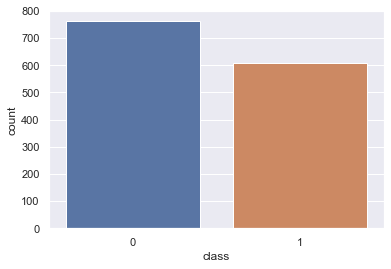

In [5]:
sns.countplot(data['class'])

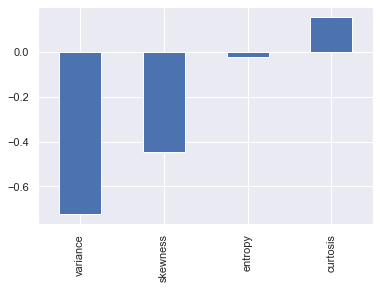

In [7]:
data.corr()['class'][:-1].sort_values().plot(kind='bar')

In [8]:
data_class_0=data[data['class']==0]
data_class_1=data[data['class']==1]

In [9]:
data_class_0.shape

(762, 5)

In [10]:
data_class_1.shape

(610, 5)

In [11]:
x=data.drop('class',axis=1).values
y=data['class'].values

In [12]:
x.shape

(1372, 4)

In [19]:
y.shape

(1372,)

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_sample(x,y)

In [17]:
x_sm.shape

(1524, 4)

In [18]:
y_sm.shape

(1524,)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [22]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [23]:
x_train

array([[0.54688503, 0.74107474, 0.30019601, 0.73533375],
       [0.52403906, 0.59105821, 0.08445698, 0.71842651],
       [0.32694402, 0.50685209, 0.29181726, 0.88701274],
       ...,
       [0.7633934 , 0.56174999, 0.31374416, 0.9731944 ],
       [0.62085975, 0.81200163, 0.22526797, 0.58001218],
       [0.32293447, 0.45156728, 0.29244621, 0.80705693]])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
x_train.shape

(1219, 4)

In [29]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 1219 samples, validate on 305 samples
Epoch 1/100
1219/1219 [==============================] - 0s 343us/sample - loss: 0.6719 - accuracy: 0.4996 - val_loss: 0.6619 - val_accuracy: 0.5016
Epoch 2/100
1219/1219 [==============================] - 0s 39us/sample - loss: 0.6563 - accuracy: 0.4996 - val_loss: 0.6496 - val_accuracy: 0.5016
Epoch 3/100
1219/1219 [==============================] - 0s 37us/sample - loss: 0.6445 - accuracy: 0.4996 - val_loss: 0.6389 - val_accuracy: 0.5016
Epoch 4/100
1219/1219 [==============================] - 0s 36us/sample - loss: 0.6329 - accuracy: 0.5160 - val_loss: 0.6273 - val_accuracy: 0.5410
Epoch 5/100
1219/1219 [==============================] - 0s 38us/sample - loss: 0.6206 - accuracy: 0.5989 - val_loss: 0.6154 - val_accuracy: 0.6590
Epoch 6/100
1219/1219 [==============================] - 0s 37us/sample - loss: 0.6076 - accuracy: 0.7047 - val_loss: 0.6025 - val_accuracy: 0.7016
Epoch 7/100
1219/1219 [==============================] - 0s 39us

Epoch 56/100
1219/1219 [==============================] - 0s 38us/sample - loss: 0.1893 - accuracy: 0.9614 - val_loss: 0.1807 - val_accuracy: 0.9574
Epoch 57/100
1219/1219 [==============================] - 0s 36us/sample - loss: 0.1854 - accuracy: 0.9639 - val_loss: 0.1802 - val_accuracy: 0.9574
Epoch 58/100
1219/1219 [==============================] - 0s 38us/sample - loss: 0.1820 - accuracy: 0.9614 - val_loss: 0.1722 - val_accuracy: 0.9607
Epoch 59/100
1219/1219 [==============================] - 0s 37us/sample - loss: 0.1814 - accuracy: 0.9557 - val_loss: 0.1704 - val_accuracy: 0.9574
Epoch 60/100
1219/1219 [==============================] - 0s 35us/sample - loss: 0.1756 - accuracy: 0.9631 - val_loss: 0.1663 - val_accuracy: 0.9574
Epoch 61/100
1219/1219 [==============================] - 0s 37us/sample - loss: 0.1724 - accuracy: 0.9631 - val_loss: 0.1623 - val_accuracy: 0.9607
Epoch 62/100
1219/1219 [==============================] - 0s 38us/sample - loss: 0.1694 - accuracy: 0.9614

In [31]:
metrics=pd.DataFrame(model.history.history)

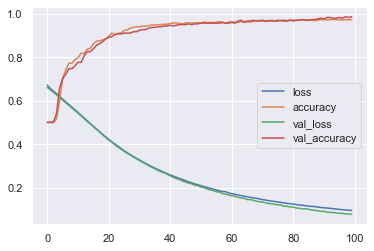

In [32]:
metrics.plot()

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [35]:
model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test),callbacks=[earlystop])

Train on 1219 samples, validate on 305 samples
Epoch 1/150
1219/1219 [==============================] - 0s 39us/sample - loss: 0.0944 - accuracy: 0.9737 - val_loss: 0.0754 - val_accuracy: 0.9902
Epoch 2/150
1219/1219 [==============================] - 0s 39us/sample - loss: 0.0930 - accuracy: 0.9737 - val_loss: 0.0757 - val_accuracy: 0.9869
Epoch 3/150
1219/1219 [==============================] - 0s 39us/sample - loss: 0.0914 - accuracy: 0.9729 - val_loss: 0.0744 - val_accuracy: 0.9869
Epoch 4/150
1219/1219 [==============================] - 0s 39us/sample - loss: 0.0902 - accuracy: 0.9729 - val_loss: 0.0743 - val_accuracy: 0.9902
Epoch 5/150
1219/1219 [==============================] - 0s 36us/sample - loss: 0.0891 - accuracy: 0.9770 - val_loss: 0.0701 - val_accuracy: 0.9902
Epoch 6/150
1219/1219 [==============================] - 0s 38us/sample - loss: 0.0881 - accuracy: 0.9746 - val_loss: 0.0696 - val_accuracy: 0.9902
Epoch 7/150
1219/1219 [==============================] - 0s 36us/

Epoch 56/150
1219/1219 [==============================] - 0s 38us/sample - loss: 0.0538 - accuracy: 0.9795 - val_loss: 0.0380 - val_accuracy: 0.9934
Epoch 57/150
1219/1219 [==============================] - 0s 38us/sample - loss: 0.0536 - accuracy: 0.9820 - val_loss: 0.0356 - val_accuracy: 0.9934
Epoch 58/150
1219/1219 [==============================] - 0s 37us/sample - loss: 0.0538 - accuracy: 0.9803 - val_loss: 0.0340 - val_accuracy: 0.9934
Epoch 59/150
1219/1219 [==============================] - 0s 37us/sample - loss: 0.0527 - accuracy: 0.9795 - val_loss: 0.0355 - val_accuracy: 0.9967
Epoch 60/150
1219/1219 [==============================] - 0s 37us/sample - loss: 0.0522 - accuracy: 0.9811 - val_loss: 0.0344 - val_accuracy: 0.9934
Epoch 61/150
1219/1219 [==============================] - 0s 36us/sample - loss: 0.0523 - accuracy: 0.9803 - val_loss: 0.0357 - val_accuracy: 0.9934
Epoch 62/150
1219/1219 [==============================] - 0s 38us/sample - loss: 0.0517 - accuracy: 0.9803

Epoch 111/150
1219/1219 [==============================] - 0s 37us/sample - loss: 0.0395 - accuracy: 0.9861 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 112/150
1219/1219 [==============================] - 0s 37us/sample - loss: 0.0393 - accuracy: 0.9820 - val_loss: 0.0238 - val_accuracy: 0.9967
Epoch 113/150
1219/1219 [==============================] - 0s 39us/sample - loss: 0.0394 - accuracy: 0.9852 - val_loss: 0.0261 - val_accuracy: 0.9967
Epoch 114/150
1219/1219 [==============================] - 0s 38us/sample - loss: 0.0407 - accuracy: 0.9844 - val_loss: 0.0243 - val_accuracy: 0.9967
Epoch 115/150
1219/1219 [==============================] - 0s 37us/sample - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 116/150
1219/1219 [==============================] - 0s 38us/sample - loss: 0.0389 - accuracy: 0.9828 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 117/150
1219/1219 [==============================] - 0s 38us/sample - loss: 0.0387 - accuracy:

In [36]:
model.evaluate(x_test,y_test)

305/305 [==============================] - 0s 63us/sample - loss: 0.0216 - accuracy: 0.9967


[0.02156876390036501, 0.9967213]

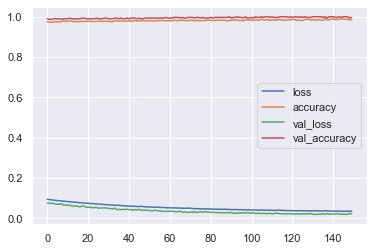

In [37]:
metrics=pd.DataFrame(model.history.history)
metrics.plot()

In [41]:
prediction=model.predict_classes(x_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.99      1.00       152

    accuracy                           1.00       305
   macro avg       1.00      1.00      1.00       305
weighted avg       1.00      1.00      1.00       305



In [44]:
print(confusion_matrix(y_test,prediction))

[[153   0]
 [  1 151]]
